In [125]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [126]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [127]:
vocab_size = 7000
embedding_dim = 64
max_length = 300
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [128]:
articles = []
labels = []

with open("clean_uza_mini.csv", 'r', encoding="utf8") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        articles.append(row[2])        
print(len(labels))
print(len(articles))

1000
1000


In [129]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

800
800
800
200
200


In [130]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))
# count = 0
# for p in train_sequences:
#     count = count + len(p)
# print(count/1477)

191
300
105
300


In [131]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

200
(200, 300)


In [132]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    # specify the number of convolutions that you want to learn, their size, and their activation function.
    # words will be grouped into the size of the filter in this case 5
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 300, 64)           448000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 296, 128)          41088     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 390       
Total params: 497,734
Trainable params: 497,734
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [135]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 - 3s - loss: 1.7034 - accuracy: 0.2463 - val_loss: 1.5861 - val_accuracy: 0.3000
Epoch 2/10
800/800 - 2s - loss: 1.3829 - accuracy: 0.4563 - val_loss: 1.2883 - val_accuracy: 0.4200
Epoch 3/10
800/800 - 2s - loss: 1.1246 - accuracy: 0.5088 - val_loss: 1.0913 - val_accuracy: 0.5000
Epoch 4/10
800/800 - 2s - loss: 0.9310 - accuracy: 0.6250 - val_loss: 0.9944 - val_accuracy: 0.5450
Epoch 5/10
800/800 - 2s - loss: 0.7375 - accuracy: 0.7575 - val_loss: 0.8157 - val_accuracy: 0.6350
Epoch 6/10
800/800 - 2s - loss: 0.4989 - accuracy: 0.8550 - val_loss: 0.5992 - val_accuracy: 0.8100
Epoch 7/10
800/800 - 2s - loss: 0.3122 - accuracy: 0.9237 - val_loss: 0.4826 - val_accuracy: 0.8400
Epoch 8/10
800/800 - 2s - loss: 0.1821 - accuracy: 0.9525 - val_loss: 0.4141 - val_accuracy: 0.8500
Epoch 9/10
800/800 - 2s - loss: 0.1025 - accuracy: 0.9837 - val_loss: 0.3677 - val_accuracy: 0.8950
Epoch 10/10
800/800 - 2s - loss: 0.0612 - accuracy: 0.

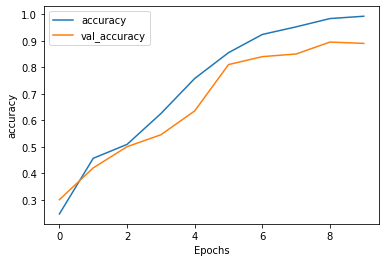

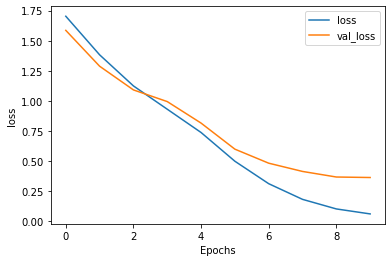

In [136]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")